In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import optimize as op
import pandas as pd

In [3]:
Data = pd.read_excel("seebeck.xlsx")

In [4]:
T_h = Data["T_h"].to_numpy()
T_c = Data["T_c"].to_numpy()
delta_T = T_h - T_c
volt1 = Data["volt1"].to_numpy()
volt2 = Data["volt2"].to_numpy()
current = Data["current2"].to_numpy()

(0.034537084398976986, -0.0543821702594082, array([0.00111999, 0.01396699]))

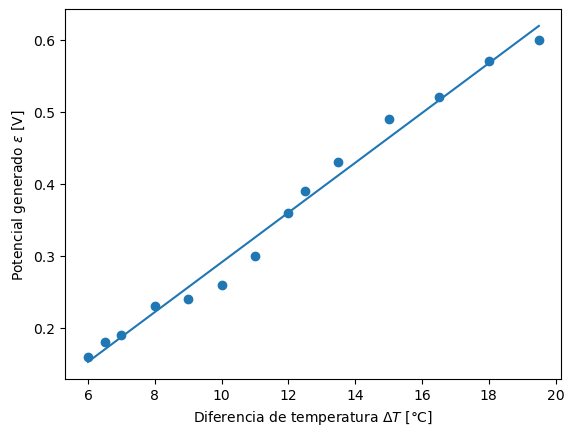

In [5]:
plt.scatter(delta_T,volt1)
(a,b),cov = np.polyfit(delta_T,volt1,1,cov=True)
x = np.linspace(delta_T[0],delta_T[-1])
y = a*x + b
plt.plot(x,y)
plt.xlabel(r"Diferencia de temperatura $\Delta T$ [°C]")
plt.ylabel(r"Potencial generado $\varepsilon$ [V]")
plt.savefig("voltaje_deltaT.pdf")
a,b,np.sqrt(np.diag(cov))

(1.6218925831202042, -0.9000949945195456, array([0.03301895, 0.4117687 ]))

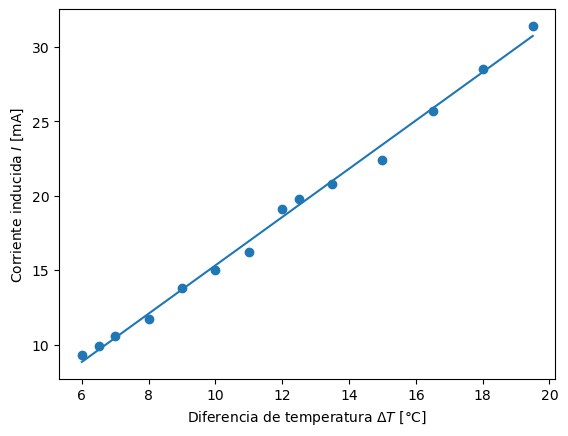

In [6]:
plt.scatter(delta_T,current)
(a,b),cov = np.polyfit(delta_T,current,1,cov=True)
x = np.linspace(delta_T[0],delta_T[-1])
y = a*x + b
plt.plot(x,y)
plt.xlabel(r"Diferencia de temperatura $\Delta T$ [°C]")
plt.ylabel(r"Corriente inducida $I$ [mA]")
plt.savefig("corriente_deltaT.pdf")
a,b,np.sqrt(np.diag(cov))

(0.034446203651287866,
 -0.004730354868383902,
 array([0.00013757, 0.00266703]),
 -7.281949158088473)

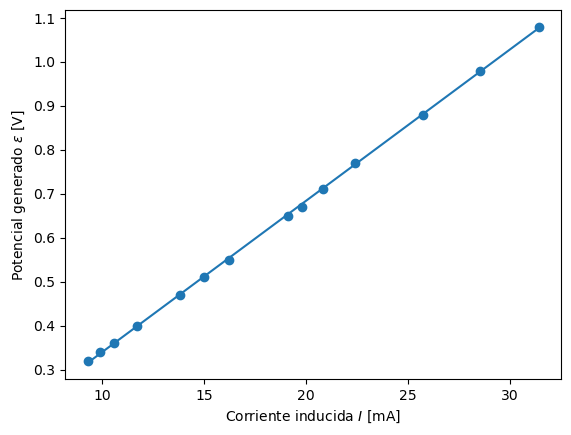

In [7]:
plt.scatter(current,volt2)
(a,b),cov = np.polyfit(current,volt2,1,cov=True)
x = np.linspace(current[0],current[-1])
y = a*x + b
plt.plot(x,y)
plt.xlabel(r"Corriente inducida $I$ [mA]")
plt.ylabel(r"Potencial generado $\varepsilon$ [V]")
plt.savefig("volt_corriente.pdf")
a,b,np.sqrt(np.diag(cov)),a/b

In [8]:
a/b

-7.281949158088473

In [9]:
def GetPropagation(expr,vars,sigmas,measures):
    prop = 0
    for i in range(len(measures)):
        prop += expr.diff(var[i])**2 * sigmas[i]**2
    
    sigma = sym.sqrt(prop)
    print(sigma)
    #Sección para soltar el valor calculado y la incertidumbre del valor calculado. 
    
    sigma = sym.lambdify(var,sigma)
    mean = sym.lambdify(var,expr)
    print(mean)
    return mean(*measures),sigma(*measures)

In [13]:
vars = "a b"
var = sym.symbols(vars)
exp1 = -var[0]/var[1]

mea1 = np.array([a,b])
un1 = np.array([np.sqrt(np.diag(cov))[0],np.sqrt(np.diag(cov))[1]])

print(GetPropagation(exp1,var,un1,mea1))


0.00266702556790761*sqrt(a**2/b**4 + 0.0026607977071526/b**2)
<function _lambdifygenerated at 0x000001F1E1F409D0>
(7.281949158088473, 4.1057452102031915)
